# **Modelling phase**


## **Objectives**
1. **Primary Objective**: Model the churn variable using the variables in the data.
2. **Secondary Objective**: Predict customer churn using classification models.
3. **Inference**: Provide useful insights to lower churn
4. **Comparison Objective**: Evaluate model performance :
   - Choosing the best subset of the variables to make the model.

## **Dataset Preparation**
1. **Data Splitting**: Split the data into training and testing sets.
2. **Scaling**: Apply StandardScaler to scale the data.
3. **PCA Application**:
   - Apply PCA on Dataset 2 .
   - Determine the number of components based on explained variance.

## **Modeling Approach**


### **Churn Classification**
- **Model Selection**: Start with logistic regression and choose relevant variables in the model, 
- **Evaluation**: Compare models using bic, as bic gives the best model as the sample size is large.
- **Cross-Validation**: Use cross-validation to validate model performance.

## **Comparison and Results**
1. **Performance Metrics**: Summarize and compare model performance across datasets.
2. **Discussion**: Analyze the impact of feature engineering vs. PCA and discuss trade-offs.

In [68]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [70]:
# Importing data
f_df = pd.read_csv('data/Fancy_data.csv')

## Working on the Fancy Dataset

Here we take on the engineered dataset and perform the following on it:
- Take logistic model on PCA data and interpret results.
- Take logistic model on data.
- Provide some useful insights.

In [71]:
f_df.shape

(7010, 14)

In [72]:
outlier_tag = f_df['RobustOutlier']
f_df.drop('RobustOutlier',axis=1,inplace=True)

<Axes: >

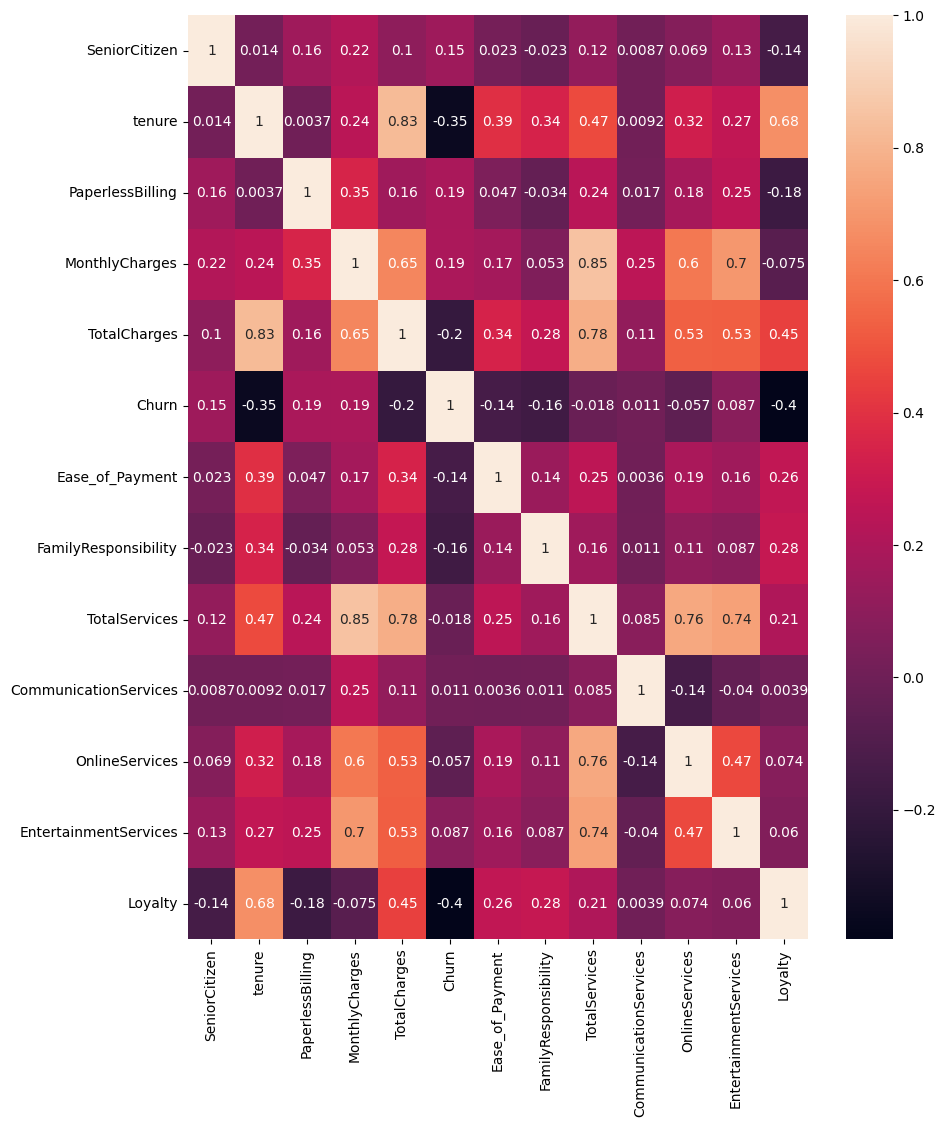

In [73]:
plt.figure(figsize=(10,12))
sns.heatmap(f_df.corr(),annot=True)

**Interpretation :** 

 * We observe that `Churn` is quite correlated with `Tenure` and `Loyalty`.
 *  Also we see that tenure is highly correlated with a lot of variables `Ease of Payment` , `FamilyResponsibility` and `Loyalty`.

In [74]:
# Extracting response and design matrix
y = pd.DataFrame(f_df['Churn'])
X = f_df.drop(['Churn'],axis=1)

### Checking Assumptions
We have to check some assumptions for the logistic model to give a relevant interpretation.
Here are some of the assumptions we are looking to check:
- Multicolinearity
- Outlier Removal
- Independence of outcomes (which we assume from the given data)
- Linearity of log

In [75]:
# Checking multicolinearity


# Calculate VIF for each variable
def vif(X):
    X_v = add_constant(X)  # include your predictors
    vif = pd.DataFrame()
    vif["Variable"] = X_v.columns
    vif["VIF"] = [variance_inflation_factor(X_v.values, i) for i in range(X_v.shape[1])]
    print(vif)
vif(X)

                 Variable        VIF
0                   const  25.821859
1           SeniorCitizen   1.097138
2                  tenure   7.378640
3        PaperlessBilling   1.192479
4          MonthlyCharges   7.616328
5            TotalCharges  10.490248
6         Ease_of_Payment   1.197647
7    FamilyResponsibility   1.143644
8           TotalServices  10.106809
9   CommunicationServices   1.413950
10         OnlineServices   2.919790
11  EntertainmentServices   2.670389
12                Loyalty   2.385026


We need to remove two columns of TotalCharges and Total_Services

In [76]:
X.drop(['TotalCharges','TotalServices'],axis=1,inplace=True)
vif(X)

                 Variable        VIF
0                   const  17.777505
1           SeniorCitizen   1.091772
2                  tenure   2.507412
3        PaperlessBilling   1.187705
4          MonthlyCharges   3.862008
5         Ease_of_Payment   1.192377
6    FamilyResponsibility   1.143256
7   CommunicationServices   1.412616
8          OnlineServices   1.965072
9   EntertainmentServices   2.273887
10                Loyalty   2.206049


In [77]:
# Outlier Removal
X['tag'] = ~outlier_tag
X = X[X['tag']]
y['tag'] = ~outlier_tag
y=y[y['tag']]

In [78]:
X.drop('tag',axis=1,inplace=True)
y.drop('tag',axis=1,inplace=True)

In [79]:
X.head()

,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,Ease_of_Payment,FamilyResponsibility,CommunicationServices,OnlineServices,EntertainmentServices,Loyalty
0,0,1,1,29.85,2,1,0,1,0,0
1,0,34,0,56.95,1,0,1,1,0,1
2,0,2,1,53.85,1,0,1,1,0,0
3,0,45,0,42.30,4,0,0,1,0,1
4,0,2,1,70.70,2,0,1,0,0,0


In [80]:
X.describe()

,SeniorCitizen,tenure,PaperlessBilling,MonthlyCharges,Ease_of_Payment,FamilyResponsibility,CommunicationServices,OnlineServices,EntertainmentServices,Loyalty
count,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000
mean,0.165365,30.555122,0.599880,65.449422,2.607089,0.521178,0.897867,0.618955,0.506308,0.626915
std,0.371538,23.571542,0.489959,29.044481,1.240868,0.499589,0.302846,0.485680,0.499998,0.802884
min,0.000000,1.000000,0.000000,18.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,0.000000,43.850000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,26.000000,1.000000,70.800000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,52.000000,1.000000,89.700000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,1.000000,117.450000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [81]:
y.value_counts()
y = list(y['Churn'])

Linearity of log-odds will be checked during modelling step.

### PCA Approach

Here we take the PCA of the data, interpret the PCA elements if possible and make a model out of it. 
- We will use the scree plot to pick the number of components of PCA.
- We pick the number such that the total variability ratio over 0.8.
- Interpret the PCs and give relevant names to them.
- Fit a logistic model to the data and interpret the results.

In [82]:
# Getting the scale and pca objects
scale = StandardScaler()
pca = PCA(n_components='mle')

In [83]:
# scaling the data and applying the pca on it
x_scaled = scale.fit_transform(X)
x_pca = pca.fit_transform(x_scaled)

In [84]:
x_pca

array([[-1.30707298,  0.12085203,  3.12123255, ..., -0.66236956,
        -0.80883557,  0.47496556],
       [-0.91416137,  0.57391511, -0.14286232, ...,  0.63991306,
        -1.31465631, -0.01843514],
       [-1.46556064, -1.35846229,  0.18963972, ...,  0.52790752,
        -1.45043424,  0.44729514],
       ...,
       [-1.12745459,  0.2773987 ,  3.10440409, ..., -0.53734708,
        -0.8586197 ,  0.16293736],
       [-1.29512002, -1.6089613 , -0.65471413, ...,  0.3129114 ,
        -0.1262967 ,  0.18243994],
       [ 2.67509474,  0.38666906, -0.32463586, ...,  1.21823779,
         0.07069314,  0.13742816]])

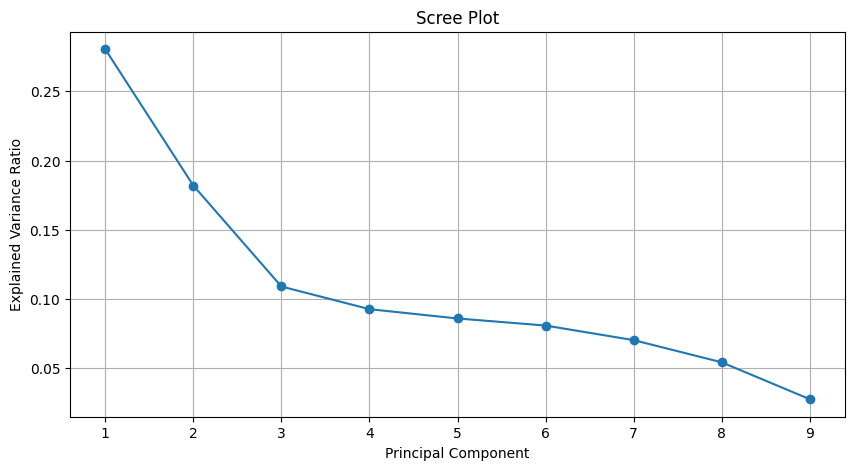

In [85]:
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# plt.savefig('vizes/scree_plot.jpg',facecolor='black', transparent=False)

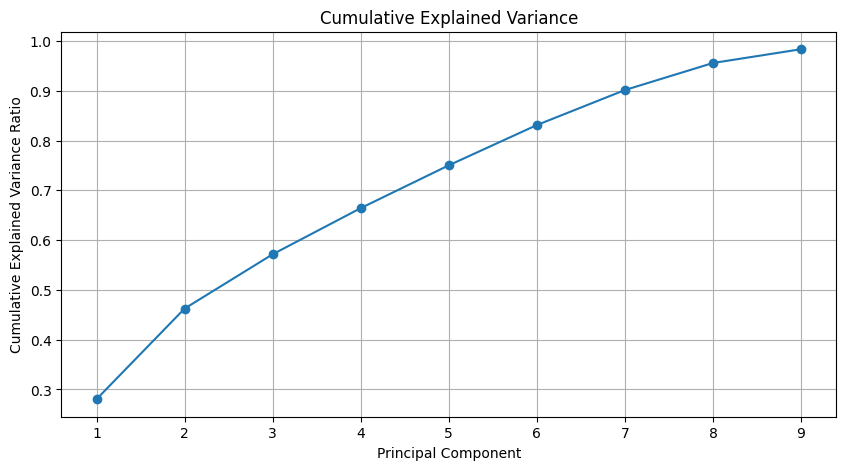

In [86]:
# Cumulative explained variance plot
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# plt.savefig('vizes/CEV.jpg')

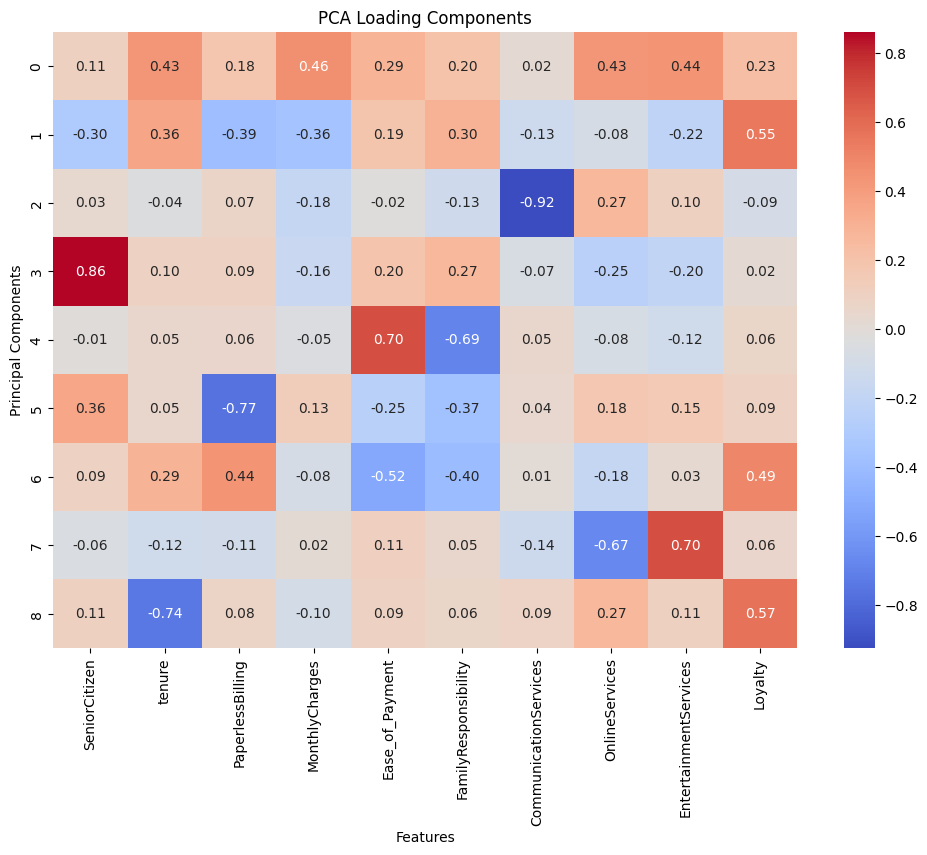

In [87]:
loading_matrix = pd.DataFrame(pca.components_, columns=X.columns)


plt.figure(figsize=(12, 8))
sns.heatmap(loading_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('PCA Loading Components')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

# plt.savefig('vizes/loading_heatmap.jpg')

### Interpretation of the PCA Loading Components:

Each row in the heatmap corresponds to one of the principal components (PCs), and each column corresponds to the original variables. The values in the heatmap represent the loadings (or weights) of the original variables for each PC. These loadings indicate the contribution of each original variable to the corresponding PC.

#### Key insights from the heatmap:

1. **PC 1:Cream Customer Index**
   - **Tenure (0.43)** and **MonthlyCharges (0.46)** are strongly positively associated.
   - **Online and Communication Services** have high positive loadings as well.
   - **Loyalty (0.23)** also shows a moderate positive association.
   - **Interpretation:** This variable takes high values for customers with long tenure, high monthly-charges and have Online and EntertainmentServices.


2. **PC 2:Youth Loyalty Index**
   - **SeniorCitizen (-0.30)** and **PaperlessBilling (-0.39)** have negative contributions.
   - **MonthlyCharges (0.30)** and **Loyalty (0.55)** have positive contributions.
   - **Interpretation:** This PC might be separating younger customers with paperless billing and lower loyalty from older customers with paper-based billing and higher loyalty.

3. **PC 3:Purely Online Customers**
   - **Communication Services(-0.92)** has a very high negative loading, while other variables have minimal contributions.
   - **Interpretation:** This component is highly influenced by whether a customer uses a communication service or not.

4. **PC 4:Seniority Index**
    - **SeniorCitizen** has a high positive loading.
    - **Interpretation:** This PC gives high value for older customers.
    
5. **PC 5: Single Aware Natives**
   - **Ease_of_Payment (0.70)** has a large positive loading.
   - **FamilyResponsibility (-0.69)** has a large negative loading.
   - **Interpretation:** This PC contrasts customers who have easy payment options but may not be using online services frequently.

6. **PC 6: Boomer Index**
   - **PaperlessBilling (-0.77)** has a strong negative loading, while **SeniorCitizen (0.36)** contributes positively.
   - **Interpretation:** This component captures a contrast between older customers and those using paperless billing.


  
This breakdown helps identify the different customer behaviors and characteristics that each PC represents.


### Logistic Regression on PC

In this section we will use statistical methods to find out various relationship between the churn and the various predictor variables. Our main focus here is to find insights rather than predictions.

In [88]:
# Taking the first 4 PCs and doing the train-test split
pca = PCA()

X_pca = x_pca[:, :6]

In [89]:
X_pca

array([[-1.30707298,  0.12085203,  3.12123255,  0.12761035, -1.08334391,
        -1.45943589],
       [-0.91416137,  0.57391511, -0.14286232, -0.97324545, -0.13368453,
         1.50056675],
       [-1.46556064, -1.35846229,  0.18963972, -0.9271796 , -0.1540495 ,
        -0.25904127],
       ...,
       [-1.12745459,  0.2773987 ,  3.10440409,  0.16927051, -1.06107863,
        -1.438806  ],
       [-1.29512002, -1.6089613 , -0.65471413,  2.33291892, -1.43613669,
        -0.30875175],
       [ 2.67509474,  0.38666906, -0.32463586, -0.81991147,  1.51142194,
         0.03791325]])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.33, random_state=42)

In [91]:
column_names = ['Cream Customer Index','Youth Loyalty Index', 'Purely Online Customers', 'Seniority Index','Single Aware Natives', 'Boomer Index']
X_p = pd.DataFrame(X_train,columns=column_names)
X_testp = pd.DataFrame(X_test,columns = column_names)


In [92]:

# Add a constant to the PCA components (for the intercept)
X_p1 = sm.add_constant(X_p)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_p1)
result1 = logit_model.fit()

# Print the summary
print(result1.summary())
print('The BIC of the model is :', result1.bic)

Optimization terminated successfully.
         Current function value: 0.465599
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4460
Model:                          Logit   Df Residuals:                     4453
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2190
Time:                        20:03:54   Log-Likelihood:                -2076.6
converged:                       True   LL-Null:                       -2658.8
Covariance Type:            nonrobust   LLR p-value:                2.358e-248
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.3765      0.048    -28.859      0.000      -1.470   

We remove `Seniortiy Index` as the p-value is greater than 0.05

In [93]:
# Add a constant to the PCA components (for the intercept)
X_p1 = sm.add_constant(X_p.drop(['Seniority Index','Purely Online Customers'],axis=1))


# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_p1)
result1 = logit_model.fit()

# Print the summary
print(result1.summary())
print('The BIC of the model is :', result1.bic)

Optimization terminated successfully.
         Current function value: 0.465903
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4460
Model:                          Logit   Df Residuals:                     4455
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2185
Time:                        20:03:55   Log-Likelihood:                -2077.9
converged:                       True   LL-Null:                       -2658.8
Covariance Type:            nonrobust   LLR p-value:                3.124e-250
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3728      0.047    -28.927      0.000      -1.466      -1.280

In [94]:
X_p1['pred_probs'] = result1.predict(X_p1)

# Calculate logit (log odds)
X_p1['logit'] = np.log(X_p1['pred_probs'] / (1 - X_p1['pred_probs']))


In [95]:
X_testp1 = sm.add_constant(X_testp.drop(['Seniority Index','Purely Online Customers'],axis=1))

y_pred = result1.predict(X_testp1) > 0.5
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1613
           1       0.59      0.42      0.49       585

    accuracy                           0.77      2198
   macro avg       0.70      0.65      0.67      2198
weighted avg       0.75      0.77      0.75      2198

[[1440  173]
 [ 341  244]]


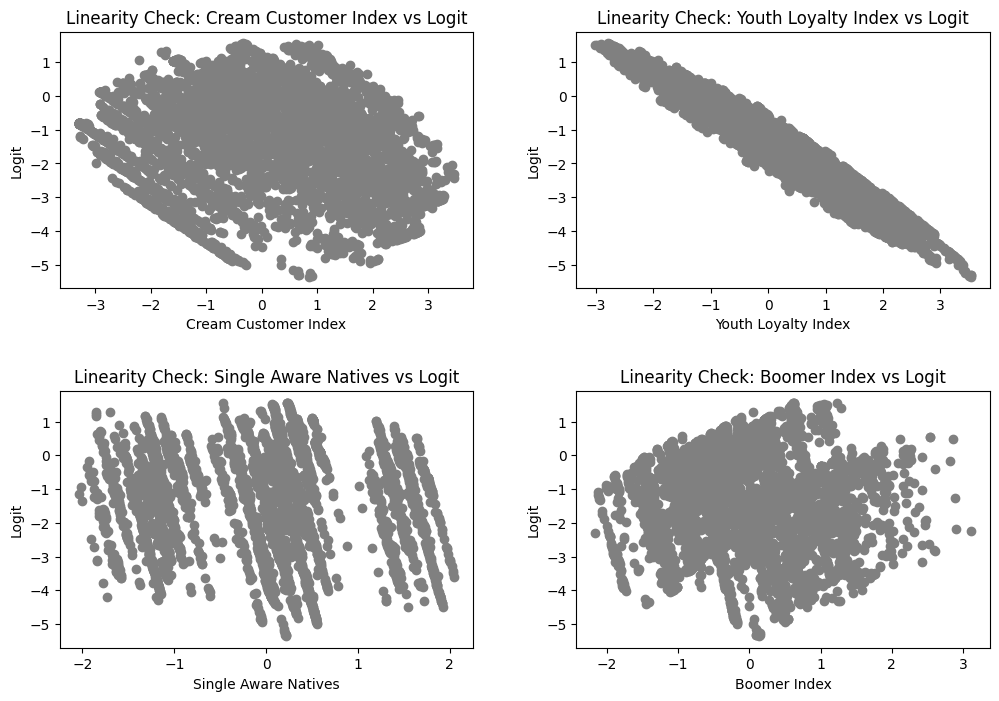

In [96]:
# Checking linearity of the log odds with the continuous variables
# Get the predicted probabilities
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

fig, axs = plt.subplots(2, 2,figsize=(12,8))
fig.subplots_adjust(wspace=0.25, hspace=0.4)

for i,col in enumerate(X_p1.drop(['const','logit','pred_probs'],axis=1).columns):  
    # Plot tenure vs logit
    axs[i//2,i%2].scatter(X_p1[f'{col}'], X_p1['logit'], color='gray')
    axs[i//2,i%2].set(title = f'Linearity Check: {col} vs Logit',xlabel = f'{col}',ylabel = 'Logit')


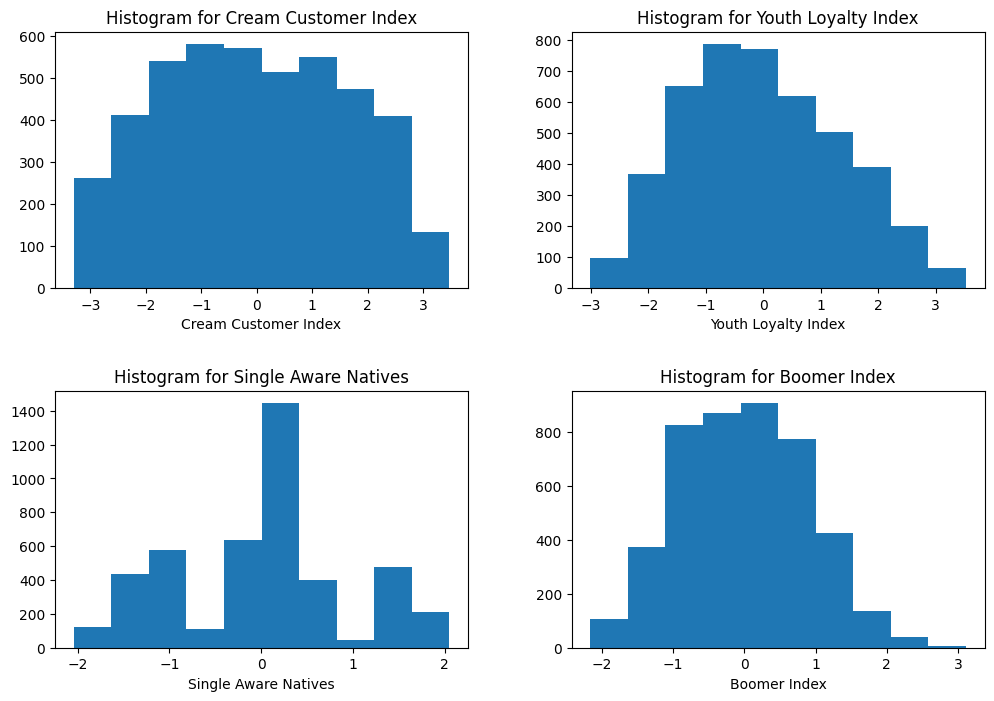

In [97]:
fig, axs = plt.subplots(2, 2,figsize=(12,8))
fig.subplots_adjust(wspace=0.25, hspace=0.4)

for i,col in enumerate(X_p1.drop(['const','logit','pred_probs'],axis=1).columns):  
    # Plot tenure vs logit
    axs[i//2,i%2].hist(X_p1[f'{col}'])
    axs[i//2,i%2].set(title = f'Histogram for {col}',xlabel = f'{col}')

In [98]:
X_p1['CreamCustomerIndex_log'] = np.log(X_p1['Cream Customer Index'] + 4)
X_p1['SingleAwareNatives_boxcox'], _ = boxcox(X_p1['Single Aware Natives'] + 4)
X_p1['BoomerIndex_sqrt'] = np.sqrt(X_p1['Boomer Index'] + 4)

In [99]:
# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_p1[['const','CreamCustomerIndex_log','SingleAwareNatives_boxcox'
                                      ,'BoomerIndex_sqrt','Youth Loyalty Index']])
result2 = logit_model.fit()

# Print the summary
print(result2.summary())
print('The BIC of the model is :', result2.bic)

Optimization terminated successfully.
         Current function value: 0.467210
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4460
Model:                          Logit   Df Residuals:                     4455
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2163
Time:                        20:04:00   Log-Likelihood:                -2083.8
converged:                       True   LL-Null:                       -2658.8
Covariance Type:            nonrobust   LLR p-value:                1.052e-247
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.8516      0.380      2.242      0.025       0.

In [100]:
X_p1['pred_probs'] = result2.predict(X_p1[['const','CreamCustomerIndex_log','SingleAwareNatives_boxcox'
                                      ,'BoomerIndex_sqrt','Youth Loyalty Index']])

# Calculate logit (log odds)
X_p1['logit'] = np.log(X_p1['pred_probs'] / (1 - X_p1['pred_probs']))

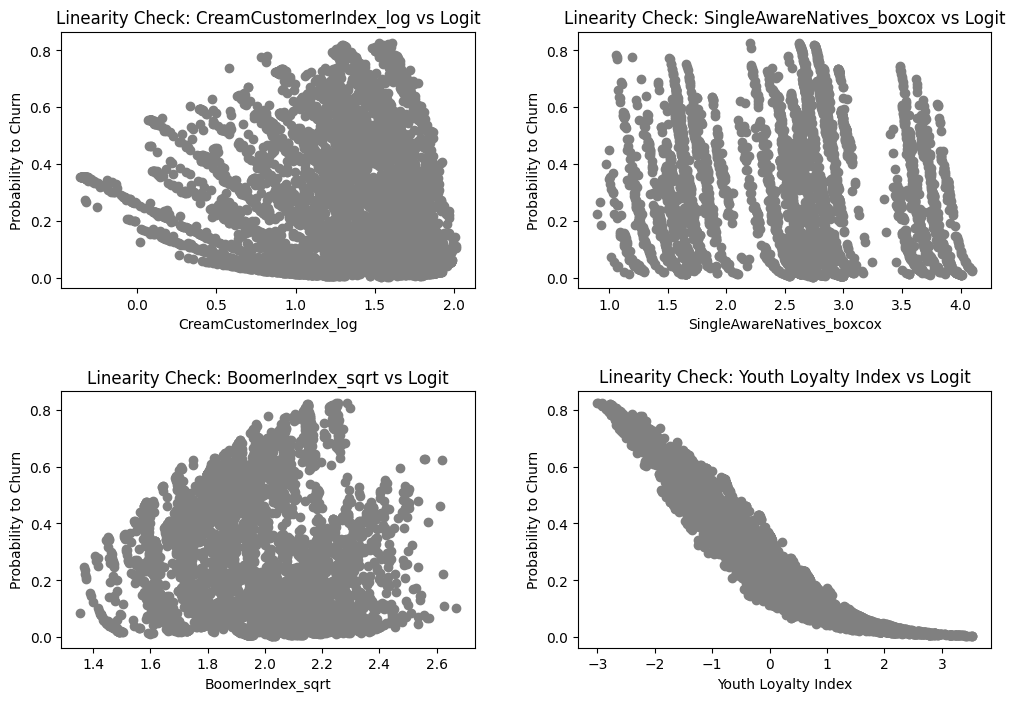

In [101]:
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

fig, axs = plt.subplots(2, 2,figsize=(12,8))
fig.subplots_adjust(wspace=0.25, hspace=0.4)

for i,col in enumerate(['CreamCustomerIndex_log','SingleAwareNatives_boxcox','BoomerIndex_sqrt','Youth Loyalty Index']):  
    # Plot tenure vs logit
    axs[i//2,i%2].scatter(X_p1[f'{col}'], X_p1['pred_probs'], color='gray')
    axs[i//2,i%2].set(title = f'Linearity Check: {col} vs Logit',xlabel = f'{col}',ylabel = 'Probability to Churn')


We don't see much improvement in the model after using transformations. So we keep the model without transformations as our model to go further from this section.

### Model Interpretation

1. The young customers who have long contract lengths are very unlikely to churn.
2. Customers who are older and are less up to date are likely to stay with the company.
3. The cream customers i.e., customers with long contract length and high monthly charges are not likely to churn.
4. People who are single, i.e., do not have any family responsibility are less likely to churn as well.

In [36]:
# Prediction
X_testp.drop(['Purely Online Customers','Seniority Index'],axis=1,inplace=True)

X_testp = sm.add_constant(X_testp)


In [37]:
pred = result1.predict(X_testp)

Text(0, 0.5, 'Accuracy')

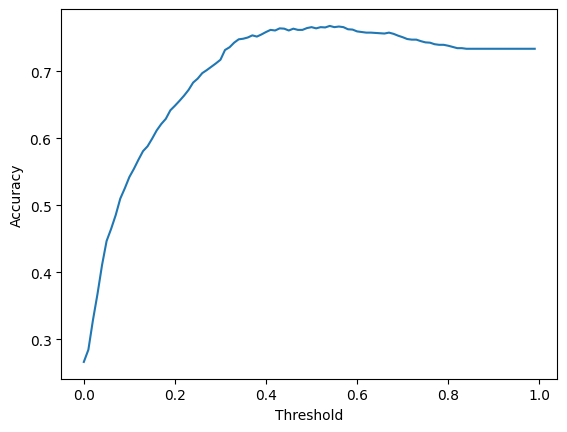

In [38]:
threshold = np.arange(0,1,step=0.01)
accuracy = []

for i in range(0,len(threshold)):
    y_pred = pred > threshold[i]
    
    a = confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[1,1]
    b = len(y_test)
    accuracy.append(a/b)

plt.plot(threshold,accuracy)

plt.xlabel('Threshold')
plt.ylabel('Accuracy')

In [39]:
# From this we pick threshold to be 0.5
y_pred = pred > 0.5

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1440  173]
 [ 341  244]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1613
           1       0.59      0.42      0.49       585

    accuracy                           0.77      2198
   macro avg       0.70      0.65      0.67      2198
weighted avg       0.75      0.77      0.75      2198



### Using non PCA Data
Now we look to model the churn based on the fancy data.
- First we scale the data.
- Fit the logistic model
- Interpret the results
- Make necessary changes to the model
- Deliver the final model.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [41]:
X_t = pd.DataFrame(X_train,columns=X.columns)
x_test = pd.DataFrame(X_test,columns=X.columns)

In [42]:
## Without PCA

scale = StandardScaler()


X1_scaled = scale.fit_transform(X_t)

In [43]:
# Add a constant to the PCA components (for the intercept)
X_2 = pd.DataFrame(X1_scaled,columns = X_t.columns)
X_train_with_const = sm.add_constant(X_2)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_const)
result2 = logit_model.fit()

# Print the summary
print(result2.summary())
print('The BIC of the model is :', result2.bic)

Optimization terminated successfully.
         Current function value: 0.438427
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4460
Model:                          Logit   Df Residuals:                     4449
Method:                           MLE   Df Model:                           10
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.2646
Time:                        22:36:28   Log-Likelihood:                -1955.4
converged:                       True   LL-Null:                       -2658.8
Covariance Type:            nonrobust   LLR p-value:                3.320e-296
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4685      0.053    -27.521      0.000      -1.573      -1.

We see that the p-value for ***Family Responsibility***  is more than 0.05, so we drop this variables in a subsequent model.


In [44]:
# Dropping these values
scale = StandardScaler()

X_1 = X_t.drop(['FamilyResponsibility'],axis=1)
X1_scaled = scale.fit_transform(X_1)

# Add a constant to the PCA components (for the intercept)
X_2 = pd.DataFrame(X1_scaled,columns = X_1.columns)
X_train_with_const = sm.add_constant(X_2)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_const)
result3 = logit_model.fit()

# Print the summary
print(result3.summary())
print('The BIC of the model is :', result3.bic)

Optimization terminated successfully.
         Current function value: 0.438510
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4460
Model:                          Logit   Df Residuals:                     4450
Method:                           MLE   Df Model:                            9
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.2644
Time:                        22:36:30   Log-Likelihood:                -1955.8
converged:                       True   LL-Null:                       -2658.8
Covariance Type:            nonrobust   LLR p-value:                3.742e-297
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4684      0.053    -27.522      0.000      -1.573      -1.

In [45]:
# Dropping these values
scale = StandardScaler()

X_2 = X_t.drop(['FamilyResponsibility','EntertainmentServices'],axis=1)
X1_scaled = scale.fit_transform(X_2)

# Add a constant to the PCA components (for the intercept)
X_3 = pd.DataFrame(X1_scaled,columns = X_2.columns)
X_train_with_const = sm.add_constant(X_3)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_with_const)
result3 = logit_model.fit()

# Print the summary
print(result3.summary())
print('The BIC of the model is :', result3.bic)

Optimization terminated successfully.
         Current function value: 0.438715
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4460
Model:                          Logit   Df Residuals:                     4451
Method:                           MLE   Df Model:                            8
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                  0.2641
Time:                        22:36:30   Log-Likelihood:                -1956.7
converged:                       True   LL-Null:                       -2658.8
Covariance Type:            nonrobust   LLR p-value:                6.784e-298
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4677      0.053    -27.527      0.000      -1.572      -1.

Here all the variables are significant. 

**Observations:**

- We see that *Tenure, TotalServices, CommunicationServices, Loyalty* and *OnlineServices* have negative coefficients.
- This implies old customers are less likely to churn.
- Users having *Communication Services* have lesser chance of churn than having Online Services.
- Users having higher monthly charge has a higher chance of churn.

**Implications:**

- Also exploring the interaction term from *OnlineServices* and *CommunicationServices* may give us some idea about customers having both the services.
- To get an idea on what services increases chance of sticking around will be useful.

In [46]:
# Adding an interaction term
X_1['ComVsOnline'] = X_1['CommunicationServices'] * X_1['OnlineServices']
X_1['ComVsEnt'] = X_1['CommunicationServices'] * X_1['EntertainmentServices']
X_1['EntVsOnline'] = X_1['EntertainmentServices'] * X_1['OnlineServices']

scale = StandardScaler()

X2_scaled = scale.fit_transform(X_1)


X3_df = pd.DataFrame(X2_scaled,columns = X_1.columns)
# Fit the model without TotalCharges
logit = sm.Logit(y_train, X3_df)
result4 = logit.fit()

# Print summary
print(result4.summary())
print('The BIC of the model is :', result4.bic)

Optimization terminated successfully.
         Current function value: 0.574115
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4460
Model:                          Logit   Df Residuals:                     4448
Method:                           MLE   Df Model:                           11
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                 0.03695
Time:                        22:36:31   Log-Likelihood:                -2560.6
converged:                       True   LL-Null:                       -2658.8
Covariance Type:            nonrobust   LLR p-value:                 3.972e-36
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
SeniorCitizen             0.1510      0.036      4.181      0.000       0.080       0.

We see two of the interaction terms are insignificant, so we remove those terms.

In [47]:
scale = StandardScaler()

X_1.drop(['ComVsOnline','ComVsEnt'],axis=1,inplace=True)

X3_scaled = scale.fit_transform(X_1)


X4_df = pd.DataFrame(X3_scaled,columns = X_1.columns)
# Fit the model without TotalCharges
logit = sm.Logit(y_train, X4_df)
result5 = logit.fit()

# Print summary
print(result5.summary())
print('The BIC of the model is :', result5.bic)

Optimization terminated successfully.
         Current function value: 0.574390
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4460
Model:                          Logit   Df Residuals:                     4450
Method:                           MLE   Df Model:                            9
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                 0.03649
Time:                        22:36:32   Log-Likelihood:                -2561.8
converged:                       True   LL-Null:                       -2658.8
Covariance Type:            nonrobust   LLR p-value:                 5.873e-37
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
SeniorCitizen             0.1517      0.036      4.204      0.000       0.081       0.

Removing *Ease of Payment*

In [48]:
scale = StandardScaler()

X_1.drop(['Ease_of_Payment'],axis=1,inplace=True)

X4_scaled = scale.fit_transform(X_1)


X5_df = pd.DataFrame(X4_scaled,columns = X_1.columns)
# Fit the model without TotalCharges
logit = sm.Logit(y_train, X5_df)
result6 = logit.fit()

# Print summary
print(result6.summary())
print('The BIC of the model is :', result6.bic)

Optimization terminated successfully.
         Current function value: 0.574783
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4460
Model:                          Logit   Df Residuals:                     4451
Method:                           MLE   Df Model:                            8
Date:                Sun, 08 Sep 2024   Pseudo R-squ.:                 0.03583
Time:                        22:36:33   Log-Likelihood:                -2563.5
converged:                       True   LL-Null:                       -2658.8
Covariance Type:            nonrobust   LLR p-value:                 6.278e-37
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
SeniorCitizen             0.1519      0.036      4.212      0.000       0.081       0.

### Observations:

- Customers who have both Online and Entertainment Services are much less likely to churn.
- Monthly Charges is the single most damping factor of churning. Customers having high MonthlyCharges are more likely to churn.

In [49]:
# X_testp.drop(['Purely Online Customers','Seniority Index'],axis=1,inplace=True)

# X_testp = sm.add_constant(X_testp)

x_test.drop(['FamilyResponsibility','EntertainmentServices'],axis=1,inplace=True)

x_testp = sm.add_constant(x_test)

In [50]:
pred = result3.predict(x_testp)

Text(0, 0.5, 'Accuracy')

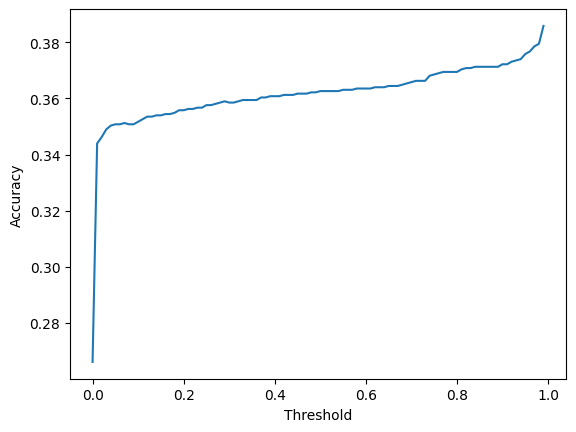

In [51]:
# Prediction using the model

threshold = np.arange(0,1,step=0.01)
accuracy = []

for i in range(0,len(threshold)):
    y_pred = pred > threshold[i]
    
    a = confusion_matrix(y_test, y_pred)[0,0] + confusion_matrix(y_test, y_pred)[1,1]
    b = len(y_test)
    accuracy.append(a/b)

plt.plot(threshold,accuracy)

plt.xlabel('Threshold')
plt.ylabel('Accuracy')

The baseline model is better than this model.


If we have a baseline model of predicting 0 for all values, then our accuracy will be approximately $75$%. So the baseline model is better than this model.

### Balancing the data

Here we look to balance the dataset and make prediction on that new dataset. And try to see some improvements to the data.

#### Using SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)



LogisticRegression(max_iter=200)

In [64]:
y_pred = model.predict(X_test)

In [66]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8484211445907525


In [65]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1604
           1       0.75      0.78      0.76      1570

    accuracy                           0.76      3174
   macro avg       0.76      0.76      0.76      3174
weighted avg       0.76      0.76      0.76      3174

[[1185  419]
 [ 344 1226]]


In [102]:
X_pca1 = pd.DataFrame(X_pca,columns=column_names).drop(['Seniority Index','Purely Online Customers'],axis=1)

In [108]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_pca1, y)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

In [110]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)



LogisticRegression(max_iter=200)

In [111]:
y_pred = model.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1604
           1       0.70      0.76      0.73      1570

    accuracy                           0.72      3174
   macro avg       0.72      0.72      0.72      3174
weighted avg       0.72      0.72      0.72      3174

[[1101  503]
 [ 382 1188]]


#### Undersampling


In [67]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X, y)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.33, random_state=42)

In [70]:
y_pred = model.predict(X_test)

In [71]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       633
           1       0.74      0.76      0.75       588

    accuracy                           0.76      1221
   macro avg       0.76      0.76      0.76      1221
weighted avg       0.76      0.76      0.76      1221

[[476 157]
 [141 447]]


In [72]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8323795552976325


#### Using class weights

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [107]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight={0: 1, 1: 2.5},max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(class_weight={0: 1, 1: 2.5}, max_iter=200)

In [108]:
y_pred = model.predict(X_test)

In [109]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc}')

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1613
           1       0.49      0.76      0.60       585

    accuracy                           0.73      2198
   macro avg       0.69      0.74      0.70      2198
weighted avg       0.79      0.73      0.74      2198

[[1153  460]
 [ 138  447]]
ROC AUC Score: 0.8240831703943918


### **Key Findings and Recommendations:**

Based on the above analysis, we propose some measures to decrease churning.

- Customers having only Communication Services are less likely to churn.
- Customers having only Internet Services are also less likely to churn.
- Customers having only one out of Internet and Entertainment Services must be marketed the other service to make them more involved into the company environment.
- The above plan must be applied in moderation as high monthly charges act as a huge reason for customers to churn. Customers having all three services might have higher monthly charges which in turn increases the probability of their churn.
- Customers who stay long with the company are much less likely to churn. We need to make the longer contract deals much more attractive to the customers than the shorter term deals.
- Senior Citizens are a much more attractive group of customers, as once they come on board, they tend to stick around.
- Younger customers with a family are also a lucrative group of customers, as they tend to take longer contracts.